# Stock Market Analysis

## We are looking at data from the stock market

**Questions:**
1. What was the change in price of the stock over time ?!
2. What was the daily return of the stock on average ?!
3. What was the moving average of the various stocks ?!
4. What was the correlation between different stocks closing prices ?!
5. What was the correlation between different stocks daily returns ?!
6. How much value do we put at risk by investing in a particular stock ?!
7. How can we attempt to predict future stock behavior ?!

### Import libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data
from datetime import datetime
from __future__ import division

sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':[10, 4]}, font_scale = 1.2)

### Read stock data from Apple, Google, Amazone, Microsoft

In [75]:
tech = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
end_time = datetime.now()
start_time = datetime(end_time.year - 1, end_time.month, end_time.day)

for stock in tech:
    globals()[stock] = data.DataReader(stock, 'yahoo', start_time, end_time)

**Note:** Using globals() is a sloppy way of setting the DataFrame names, but its simple

In [76]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-06-28,135.250000,133.350006,133.410004,134.779999,62111300.0,134.014343
2021-06-29,136.490005,134.350006,134.800003,136.330002,64556100.0,135.555557
2021-06-30,137.410004,135.869995,136.169998,136.960007,63261400.0,136.181961
2021-07-01,137.330002,135.759995,136.600006,137.270004,52485800.0,136.490204
2021-07-02,140.000000,137.750000,137.899994,139.960007,78852600.0,139.164932


**Variables Description**

* **High:** High price that day
* **Low:** Low price that day
* **Open:** Open price that day
* **Close:** Close price that day
* **Vloume:** Volume traded that day
* **Adj Close:** Adjustment Close, seems that there is a change in stock

In [77]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,157.895834,154.234523,155.974941,156.141488,8.947906e+07,155.719502
std,12.925945,12.507944,12.794171,12.704064,2.701683e+07,12.739699
min,132.389999,129.039993,130.070007,130.059998,2.787545e+07,130.059998
25%,147.769997,145.232498,146.197498,146.147495,7.057432e+07,145.553783
50%,154.675003,150.510002,152.235001,152.284996,8.626995e+07,151.900696
75%,169.727493,165.512501,167.607498,166.727497,1.045706e+08,166.482895
max,182.940002,179.119995,182.630005,182.009995,1.954327e+08,181.511703


In [78]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2021-06-28 to 2022-06-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       252 non-null    float64
 1   Low        252 non-null    float64
 2   Open       252 non-null    float64
 3   Close      252 non-null    float64
 4   Volume     252 non-null    float64
 5   Adj Close  252 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


**Let's see historical view of closing price**

<AxesSubplot:xlabel='Date'>

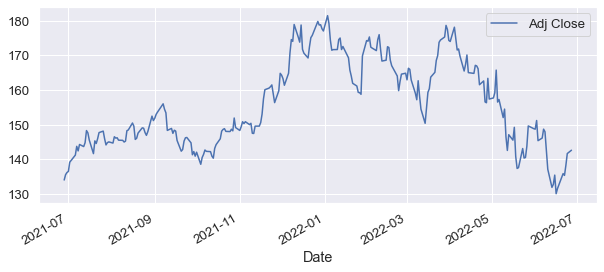

In [79]:
AAPL['Adj Close'].plot(legend = True)

**Note:** That seems that there is high adjusted closing in some days over a year and drop in others.

<AxesSubplot:xlabel='Date'>

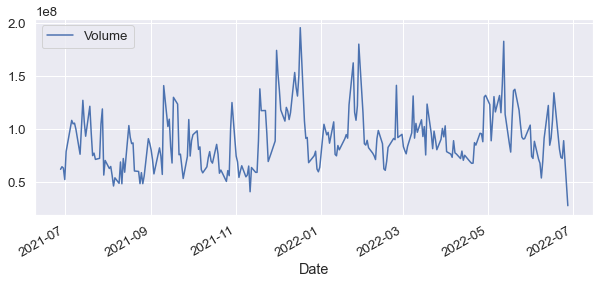

In [80]:
AAPL['Volume'].plot(legend = True)

**Note:** It seems that was definitely some peaks where the stocks were really hot.

**Now let's go ahead and caculate the moving average for the stock**

**Moving Average:** 
* Is a calculation used to analyze data points by creating a series of averages of different subsets of the full data set.
* The most common time periods used in moving averages are 15, 20, 30, 50, 100, and 200 days. 

In [81]:
MA_days = [15, 20, 50]

for day in MA_days:
    col_name = 'MA for %s days' %(str(day))
    AAPL[col_name] = AAPL['Adj Close'].rolling(day).mean()

<AxesSubplot:xlabel='Date'>

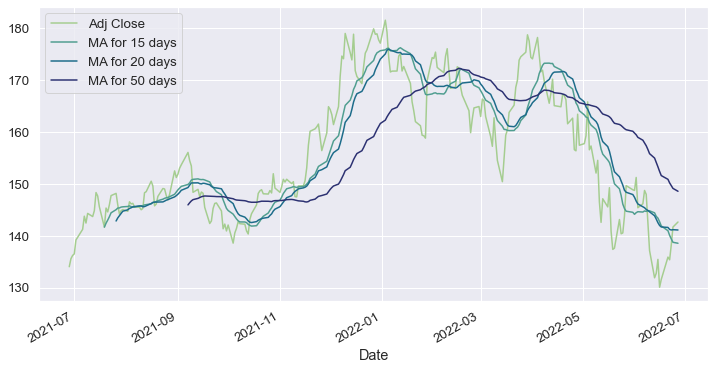

In [82]:
AAPL[['Adj Close', 'MA for 15 days', 'MA for 20 days', 'MA for 50 days']].plot(colormap = 'crest', legend = True, figsize = (12, 6))

**Let's check daily return percentage**

In [84]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()


**Note:** pct_change() Computes the percentage change from the immediately previous row by
default. This is useful in comparing the percentage of change in a time
series of elements. 

In [85]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 15 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2021-06-28,135.250000,133.350006,133.410004,134.779999,62111300.0,134.014343,NaN,NaN,NaN,NaN
2021-06-29,136.490005,134.350006,134.800003,136.330002,64556100.0,135.555557,NaN,NaN,NaN,0.011500
2021-06-30,137.410004,135.869995,136.169998,136.960007,63261400.0,136.181961,NaN,NaN,NaN,0.004621
2021-07-01,137.330002,135.759995,136.600006,137.270004,52485800.0,136.490204,NaN,NaN,NaN,0.002263
2021-07-02,140.000000,137.750000,137.899994,139.960007,78852600.0,139.164932,NaN,NaN,NaN,0.019596


<AxesSubplot:xlabel='Date'>

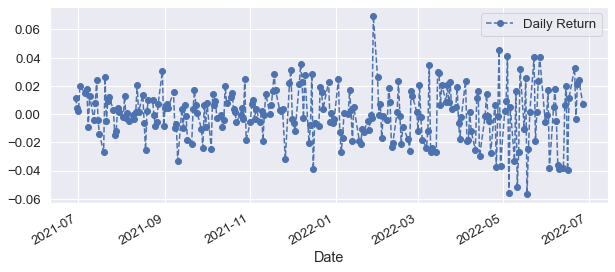

In [89]:
AAPL['Daily Return'].plot(legend = True, linestyle = '--', marker = 'o')

**Notes:**
* In some days there is a slight change in the profit even increase or decrease.
* In some other days there is a huge change in profit even increase or decrease.

**Let's see distribution of daily return**

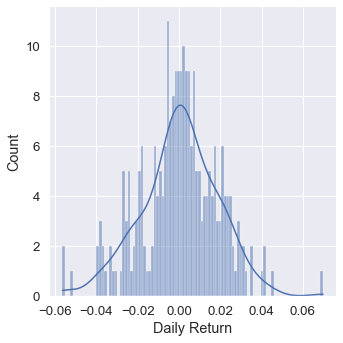

In [92]:
sns.displot(x = 'Daily Return', data = AAPL, palette='mako', kde = True, bins = 100)

**Make full dataframe with all stocks to calculate and analyze dailt return for all of them**

In [94]:
df = data.DataReader(tech, 'yahoo', start_time, end_time)['Adj Close']
df

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-06-28,134.014343,2536.389893,266.543518,172.194504
2021-06-29,135.555527,2520.370117,269.201813,172.406998
2021-06-30,136.181976,2506.320068,268.705872,172.007996
2021-07-01,136.490204,2527.370117,269.400208,171.648499
2021-07-02,139.164932,2574.379883,275.401184,175.548996
...,...,...,...,...
2022-06-21,135.869995,2240.300049,253.740005,108.680000
2022-06-22,135.350006,2240.679932,253.130005,108.949997
2022-06-23,138.270004,2253.689941,258.859985,112.440002


In [97]:
df_rets = df.pct_change()
df_rets

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-06-28,NaN,NaN,NaN,NaN
2021-06-29,0.011500,-0.006316,0.009973,0.001234
2021-06-30,0.004621,-0.005575,-0.001842,-0.002314
2021-07-01,0.002263,0.008399,0.002584,-0.002090
2021-07-02,0.019596,0.018600,0.022275,0.022724
...,...,...,...,...
2022-06-21,0.032761,0.038469,0.024591,0.023159
2022-06-22,-0.003827,0.000170,-0.002404,0.002484
2022-06-23,0.021574,0.005806,0.022637,0.032033


**Let's see the correlation between 2 stocks as example**

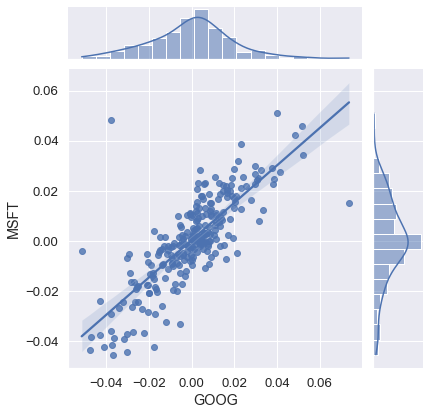

In [120]:
j = sns.jointplot(x = 'GOOG', y = 'MSFT', data = df_rets, kind = 'reg')

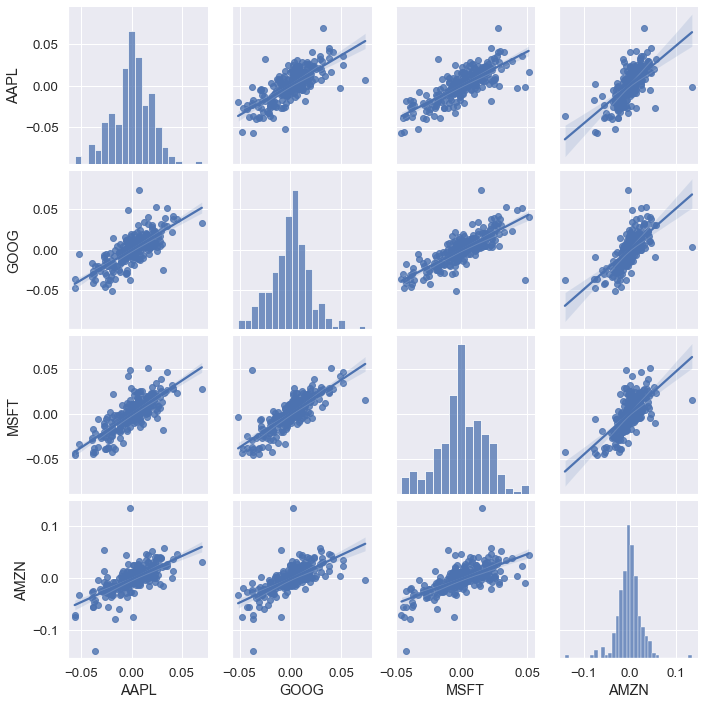

In [112]:
sns.pairplot(df_rets, kind = 'reg')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

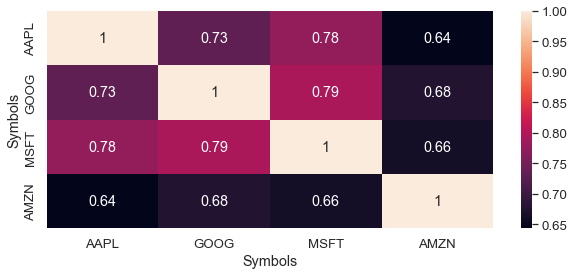

In [113]:
sns.heatmap(df_rets.corr(), annot=True)

**Let's calc Risk Analysis we will plot risk (which is the standard deviation) of daily return vs expected return.**

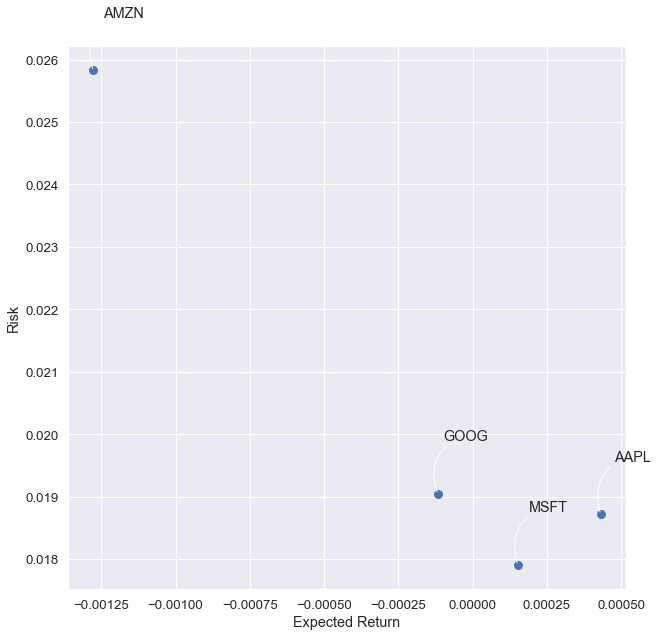

In [139]:
sns.set(rc={'figure.figsize':[10, 10]}, font_scale = 1.2)
plt.scatter(x = df_rets.mean(), y = df_rets.std(), s = np.pi * 20)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(df_rets.columns, df_rets.mean(), df_rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50), 
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=0.5'))

**Notes:**
* As we see in Amazon the expected return is aggressive to minius values and as well there is much risk.
* Google may be a good choise.
* Even Microsoft as well.
* But Apple is the best option here cuz the expected return is much more and the risk is low.
* **Risk of Microsoft is lower than Apple why we choose apple ?!**
    * Cuz it's proportion and proportion in MSFT the risk is low but also the expected return is low.
    * But in AAPL the risk not that much high from MSFT and as well the expected return is much more.

**Let's go throw value at risk: and we can treat this parameter as the amount of money we would expect to lose for a given confidence interval.**

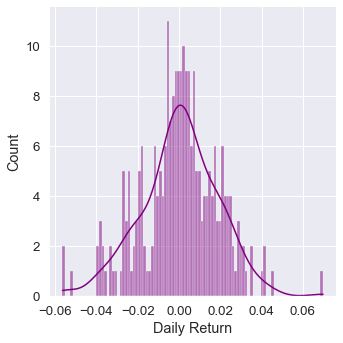

In [142]:
sns.displot(AAPL['Daily Return'], bins = 100, kde = True, color = 'purple')

In [143]:
df_rets['AAPL'].quantile(0.05)

-0.03239020855860997

**Note:** The empirical quantile of daily return is at -0.032. That means with 95% confidence, our worst daily loss will not exceed 3.2%. If we have a 1 million dollar investment, our one-day 5% VAR 0.032*1000,000 = 32,000$.

**Value at Risk using the Monte Carlo method**
Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

In [145]:
days = 365
dt = 1/days
mu = df_rets.mean()['GOOG']
sigma = df_rets.std()['GOOG']

In [149]:
def stock_monte_carlo(start_price,days,mu,sigma):
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
    return price

Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

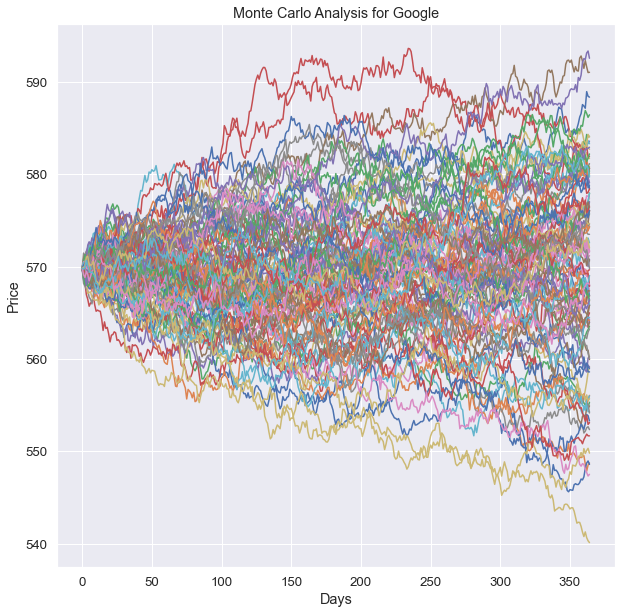

In [150]:
start_price = 569.85

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')